# Data Importing
First, import the necessary packages that will be used in our analysis and prediction.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
#import matplotlib
import seaborn as sns

## Import the data from the csv file

In [3]:
df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Quickly overview the data

In [4]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


From the result we can see there are a lot of null values in the different variables, next step I nned to clean the data.
# Data Cleaning Process
go over some variables that seem strange


In [5]:
print(df.nrOfPictures.value_counts())
print(df.abtest.value_counts())
print(df.offerType.value_counts())
print(df.seller.value_counts())



0    371528
Name: nrOfPictures, dtype: int64
test       192585
control    178943
Name: abtest, dtype: int64
Angebot    371516
Gesuch         12
Name: offerType, dtype: int64
privat        371525
gewerblich         3
Name: seller, dtype: int64


From the first check, we can drop the columns that have not a significant difference of the binomial variable.


In [6]:
df.drop(["nrOfPictures"], axis = 1, inplace = True) 
df.drop(["seller"], axis = 1, inplace = True) 
df.drop(["offerType"], axis = 1, inplace = True) 


In [7]:
df.head(5)

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


### Drop the meaningless columns

In [8]:
df.drop(['dateCrawled','postalCode','lastSeen','abtest','dateCreated'],axis = 1, inplace = True)
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


### There is a lot of month 0 in the monthOfRegistration. In order to fix that problem, I decide to convert the specific month into quarter to avoid the 0 month probelm.

In [9]:
df.monthOfRegistration.value_counts()
#dealing with the 0 month: I will deivide the month into quarter to solve the problem
df['monthOfRegistration'][df['monthOfRegistration']<4]=1
df['monthOfRegistration'][(df['monthOfRegistration']<7 )& (df['monthOfRegistration']>3)]=2
df['monthOfRegistration'][(df['monthOfRegistration']<9 )& (df['monthOfRegistration']>5) ]=3
df['monthOfRegistration'][(df['monthOfRegistration']<13) & (df['monthOfRegistration']>9)]=4
df['monthOfRegistration']= pd.to_numeric(df['monthOfRegistration'])

/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [10]:
df.head(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,1,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,2,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,2,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,3,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,3,benzin,volkswagen,nein
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,manuell,125,c_max,30000,3,benzin,ford,NaN
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manuell,101,golf,150000,1,NaN,volkswagen,NaN


In [11]:
#drop the duplicate data
cleandata1 = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration','gearbox','powerPS',
                                 'model','kilometer','monthOfRegistration','fuelType','brand'
                                 ,'notRepairedDamage'])

In [12]:
cleandata1.head()
cleandata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362160 entries, 0 to 371527
Data columns (total 12 columns):
name                   362160 non-null object
price                  362160 non-null int64
vehicleType            324782 non-null object
yearOfRegistration     362160 non-null int64
gearbox                343104 non-null object
powerPS                362160 non-null int64
model                  341893 non-null object
kilometer              362160 non-null int64
monthOfRegistration    362160 non-null int64
fuelType               329112 non-null object
brand                  362160 non-null object
notRepairedDamage      292035 non-null object
dtypes: int64(5), object(7)
memory usage: 35.9+ MB


In [13]:
#refill the missing value
cleandata1.isnull().sum()
#cleandata2 = cleandata 

name                       0
price                      0
vehicleType            37378
yearOfRegistration         0
gearbox                19056
powerPS                    0
model                  20267
kilometer                  0
monthOfRegistration        0
fuelType               33048
brand                      0
notRepairedDamage      70125
dtype: int64

## To keep the most usefule data in the dataset, I tried to drop all the missing value first and have a look of the result 

In [14]:
#in order to not add noise in the dataset, I decide to try to delete the null value and then check the data volumn.
cleandata2 = cleandata1.dropna()

In [15]:
cleandata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254401 entries, 3 to 371527
Data columns (total 12 columns):
name                   254401 non-null object
price                  254401 non-null int64
vehicleType            254401 non-null object
yearOfRegistration     254401 non-null int64
gearbox                254401 non-null object
powerPS                254401 non-null int64
model                  254401 non-null object
kilometer              254401 non-null int64
monthOfRegistration    254401 non-null int64
fuelType               254401 non-null object
brand                  254401 non-null object
notRepairedDamage      254401 non-null object
dtypes: int64(5), object(7)
memory usage: 25.2+ MB


### The remaining data has 252k records, it deleted nearly 1/3 records.
### I cannot directly delete the missing value. 
### I decide to create a high dimensioanl variable to handle the missing value.
create the useful function to add a high dimension variable in order to check the missing value or not


In [16]:

def set_vehicleType(df):
    df.loc[(df.vehicleType.notnull()), 'vehicletype_unknown']= 0
    df.loc[(df.vehicleType.isnull()), 'vehicletype_unknown']= 1
    return df
def set_notRepairedDamage(df):
    df.loc[(df.notRepairedDamage.notnull()), 'notRepaired_unknown']= 0
    df.loc[(df.notRepairedDamage.isnull()), 'notRepaired_unknown']= 1
    return df
def set_fuelType(df):
    df.loc[(df.fuelType.notnull()), 'fuelType_unknown']= 0
    df.loc[(df.fuelType.isnull()), 'fuelType_unknown']= 1
    return df
def set_gearbox(df):
    df.loc[(df.gearbox.notnull()), 'gearbox_unknown']= 0
    df.loc[(df.gearbox.isnull()), 'gearbox_unknown']= 1
    return df
def set_model(df):
    df.loc[(df.model.notnull()), 'model_unknown']= 0
    df.loc[(df.model.isnull()), 'model_unknown']= 1
    return df

In [17]:
set_vehicleType(cleandata1)
set_notRepairedDamage(cleandata1)
set_fuelType(cleandata1)
set_gearbox(cleandata1)
set_model(cleandata1)

/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,vehicletype_unknown,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,1,benzin,volkswagen,NaN,1.0,1.0,0.0,0.0,0.0
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,2,diesel,audi,ja,0.0,0.0,0.0,0.0,1.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,NaN,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,2,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,1.0,1.0,1.0,1.0,1.0
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,1,benzin,smart,nein,0.0,0.0,0.0,0.0,0.0
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,1,diesel,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,2,diesel,volkswagen,NaN,0.0,1.0,0.0,0.0,0.0


In [18]:
cleandata1.head(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,vehicletype_unknown,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,1,benzin,volkswagen,NaN,1.0,1.0,0.0,0.0,0.0
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,2,diesel,audi,ja,0.0,0.0,0.0,0.0,1.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,NaN,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,2,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein,0.0,0.0,0.0,0.0,0.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,bmw,ja,0.0,0.0,0.0,0.0,0.0
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,3,benzin,peugeot,nein,0.0,0.0,0.0,0.0,0.0
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,3,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,manuell,125,c_max,30000,3,benzin,ford,NaN,0.0,1.0,0.0,0.0,0.0
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manuell,101,golf,150000,1,NaN,volkswagen,NaN,0.0,1.0,1.0,0.0,0.0


In [19]:
#After creating a high dimention table,I replace the the null-value with not-declared
cleandata1['notRepairedDamage'].fillna(value='not-declared', inplace=True)
cleandata1['fuelType'].fillna(value='not-declared', inplace=True)
cleandata1['gearbox'].fillna(value='not-declared', inplace=True)
cleandata1['vehicleType'].fillna(value='not-declared', inplace=True)
cleandata1['model'].fillna(value='not-declared', inplace=True)

/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Deal with outliers

In [20]:

print(cleandata1["yearOfRegistration"].describe())
print(cleandata1["price"].describe())
print(cleandata1["powerPS"].describe())



count    362160.000000
mean       2004.581262
std          93.907269
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64
count    3.621600e+05
mean     1.760563e+04
std      3.634062e+06
min      0.000000e+00
25%      1.111000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64
count    362160.000000
mean        115.711128
std         194.232814
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64


In [21]:
cleandf = cleandata1[
        (cleandata1.yearOfRegistration <= 2016) 
      & (cleandata1.yearOfRegistration >= 1950) 
      & (cleandata1.price >= 100) 
      & (cleandata1.price <= 150000) 
      & (cleandata1.powerPS >= 10) 
      & (cleandata1.powerPS <= 500)]


In [22]:
cleandf.head()
#cleandf.info()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,vehicletype_unknown,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,not-declared,125000,2,diesel,audi,ja,0.0,0.0,0.0,0.0,1.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,not-declared,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,2,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein,0.0,0.0,0.0,0.0,0.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,bmw,ja,0.0,0.0,0.0,0.0,0.0


## Data Visualization 


gearbox
manuell         231535
automatik        66808
not-declared      5259
Name: gearbox, dtype: int64


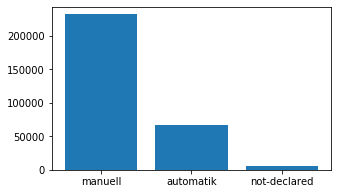

model
golf            24768
andere          21711
3er             17652
not-declared    11349
polo            10457
Name: model, dtype: int64


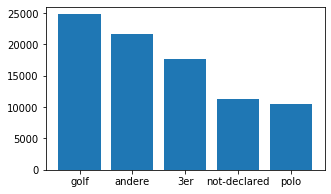

brand
volkswagen       64709
bmw              34359
opel             31691
mercedes_benz    29525
audi             27931
Name: brand, dtype: int64


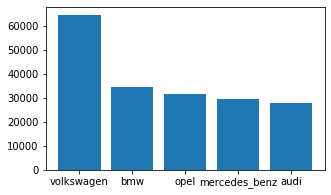

vehicleType
limousine     84634
kleinwagen    68265
kombi         59763
bus           26964
cabrio        20900
Name: vehicleType, dtype: int64


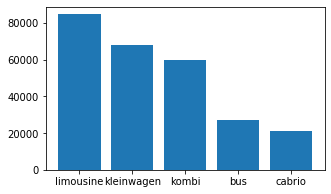

fuelType
benzin          189533
diesel           93159
not-declared     15398
lpg               4643
cng                474
Name: fuelType, dtype: int64


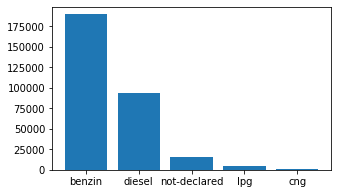

notRepairedDamage
nein            233193
not-declared     42109
ja               28300
Name: notRepairedDamage, dtype: int64


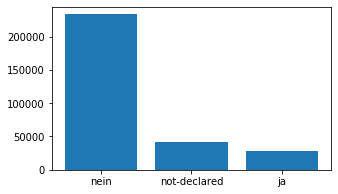

In [23]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for c in categories:
    v = cleandf[c].unique()
    
    g = cleandf.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

# Feature Engineering
Except for name(because it is meaningless to convert to numeric value), we want to transform all the string value into numeric value inorder to better fit the model using the new feature


In [24]:
#except for name, we want to transform all the string value into numeric value inorder to better fit the model using the new feature
labels = [ 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(cleandf[l])
    tr = les[l].transform(cleandf[l]) 
    cleandf.loc[:, l + '_feat'] = pd.Series(tr, index=cleandf.index)

labeled = cleandf[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        ] 
                    + [x+"_feat" for x in labels]]

In [25]:
cleandf.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,not-declared,125000,2,diesel,...,0.0,0.0,0.0,1.0,1,0,163,1,3,3
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,...,1.0,0.0,0.0,0.0,0,2,119,14,3,8
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,2,benzin,...,0.0,0.0,0.0,0.0,1,1,118,38,1,4
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,...,0.0,0.0,0.0,0.0,1,1,103,31,3,4
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,...,0.0,0.0,0.0,0.0,1,0,11,2,1,6


## Go over the correlation to check the relationship between the variables


In [26]:
corr = cleandf.corr()
print(corr)

                           price  yearOfRegistration   powerPS  kilometer  \
price                   1.000000            0.385114  0.572959  -0.444355   
yearOfRegistration      0.385114            1.000000  0.186317  -0.333751   
powerPS                 0.572959            0.186317  1.000000  -0.014584   
kilometer              -0.444355           -0.333751 -0.014584   1.000000   
monthOfRegistration     0.027372            0.030664  0.025559  -0.010533   
vehicletype_unknown    -0.081723            0.171503 -0.064374   0.038966   
notRepaired_unknown    -0.133714           -0.102821 -0.084498   0.083290   
fuelType_unknown       -0.086917           -0.018163 -0.053981   0.046881   
gearbox_unknown        -0.040950           -0.020859 -0.053107   0.000044   
model_unknown          -0.017593           -0.087684  0.007648   0.004302   
gearbox_feat           -0.297649           -0.094549 -0.447314   0.035442   
notRepairedDamage_feat -0.002529           -0.015767 -0.022855   0.005195   

## Add some useful packages and functions to better fit the model.

In [27]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier


# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [35]:



def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 14, 14 ) )
    cmap = sns.diverging_palette( 220 , 14 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

Check out the correlation plot

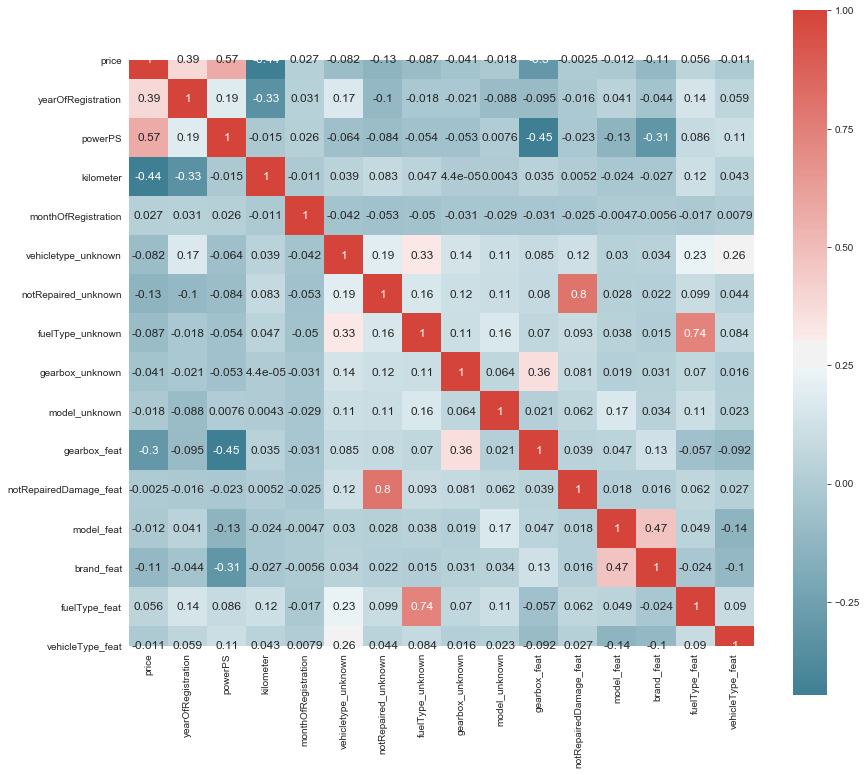

In [29]:
plot_correlation_map(cleandf)

Get the correlation between price and other variables

In [30]:
cleandf.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.572959
kilometer                 0.444355
yearOfRegistration        0.385114
gearbox_feat              0.297649
notRepaired_unknown       0.133714
brand_feat                0.105616
fuelType_unknown          0.086917
vehicletype_unknown       0.081723
fuelType_feat             0.055670
gearbox_unknown           0.040950
monthOfRegistration       0.027372
model_unknown             0.017593
model_feat                0.012457
vehicleType_feat          0.010839
notRepairedDamage_feat    0.002529
Name: price, dtype: float64

In [31]:
cleandf.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,not-declared,125000,2,diesel,...,0.0,0.0,0.0,1.0,1,0,163,1,3,3
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,...,1.0,0.0,0.0,0.0,0,2,119,14,3,8
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,2,benzin,...,0.0,0.0,0.0,0.0,1,1,118,38,1,4
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,...,0.0,0.0,0.0,0.0,1,1,103,31,3,4
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,...,0.0,0.0,0.0,0.0,1,0,11,2,1,6


In [32]:
#extract the numeric column into the final data
finaldata = cleandf[['price','yearOfRegistration','powerPS','kilometer','monthOfRegistration','notRepaired_unknown','fuelType_unknown','vehicletype_unknown','gearbox_unknown','model_unknown','gearbox_feat','notRepairedDamage_feat','model_feat','brand_feat','fuelType_feat','vehicleType_feat']]
finaldata.head()




,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,notRepaired_unknown,fuelType_unknown,vehicletype_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
1,18300,2011,190,125000,2,0.0,0.0,0.0,0.0,1.0,1,0,163,1,3,3
2,9800,2004,163,125000,3,1.0,0.0,0.0,0.0,0.0,0,2,119,14,3,8
3,1500,2001,75,150000,2,0.0,0.0,0.0,0.0,0.0,1,1,118,38,1,4
4,3600,2008,69,90000,3,0.0,0.0,0.0,0.0,0.0,1,1,103,31,3,4
5,650,1995,102,150000,4,0.0,0.0,0.0,0.0,0.0,1,0,11,2,1,6


In [33]:
#split the respons and variable
Y = finaldata['price']
X = finaldata.drop(['price'], axis='columns', inplace=False)

0.6955125460306586


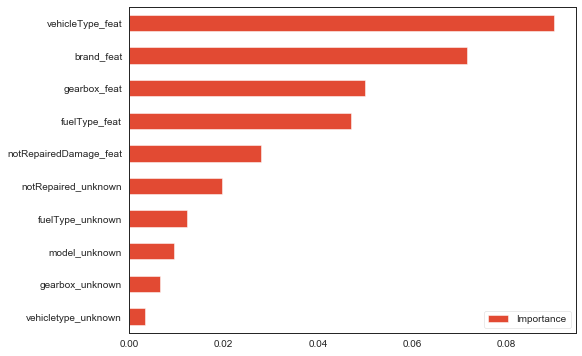

In [36]:
#using decision tree to quickly go over the factor importance
plot_variable_importance(X, Y)

In [37]:
#import the necessary package used to split the data set and 
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

# divide data into training and test set
test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(203413, 15) (100189, 15) (203413,) (100189,)


In [38]:
X_train.head()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,notRepaired_unknown,fuelType_unknown,vehicletype_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
102583,2009,143,125000,4,0.0,0.0,0.0,0.0,0.0,1,1,6,2,3,6
361610,2000,116,150000,1,0.0,0.0,0.0,0.0,0.0,1,1,118,38,1,2
56552,2006,110,150000,2,0.0,0.0,0.0,0.0,0.0,1,1,160,19,1,2
259849,1992,45,150000,4,0.0,0.0,0.0,0.0,0.0,1,1,5,25,1,4
186792,2009,160,125000,1,0.0,0.0,0.0,0.0,0.0,1,1,201,38,1,4


# Using Random Forest to train the model

In [39]:
#simply train the data using random forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_val, y_val)


0.869450543799158

In [40]:
#use the GridSearch to set the optimal parameteres for the regressor, then train the final model.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min finished


In [41]:
print(gs.best_score_)
print(gs.best_params_)

0.833923063215796
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
